In [1]:
import matplotlib.pyplot as plt
from sympy import Ellipse, Point, S,pi,plot_implicit,Eq,tan

# Занятие 14
# Алгебра

## Кривые второго порядка на плоскости: эллипс

https://ru.wikipedia.org/wiki/%D0%AD%D0%BB%D0%BB%D0%B8%D0%BF%D1%81

В Geometry есть класс эллипсов Ellipse, 
экземпляры класса задаются точкой - центром эллипса и горизонтальной и вертикальной полуосями

Эллипс Ellipse0: центр в начале координат, полуоси 13 и 5

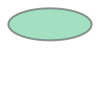

In [2]:
Ellipse0 = Ellipse(Point(0, 0), 13, 5)
Ellipse0

Эллипс можно задать центром, горизонтальной полуосью и эксцентриситетом

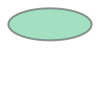

In [3]:
Ellipse2 = Ellipse(Point(3, 1), hradius=13, eccentricity=S(12)/13)
Ellipse2

### Атрибуты класса Ellipse

#### center 
центр эллипса, точка пересечения его осей
	

#### hradius
горизонтальная полуось
    
#### vradius
вертикальная полуось	

#### area
площадь	

#### circumference
длина (дуги) эллипса (аналог длины окружности)	

#### eccentricity
эксцентриситет отношение фокусного расстояния к горизонтальной оси (той, на которой расположены фокусы)	

#### periapsis
перифокусное расстояние (минимальное расстояние от фокуса до точки на эллипсе)	

#### apoapsis
апофокусное расстояние (максимальное расстояние от фокуса до точки на эллипсе)	

#### focus_distance
фокусное расстояние - половина расстояния между фокусами	

#### foci
фокусы 

In [4]:
list_props=[Ellipse2.center,Ellipse2.hradius,Ellipse2.vradius,Ellipse2.area,Ellipse2.circumference,Ellipse2.eccentricity,Ellipse2.periapsis,Ellipse2.apoapsis,Ellipse2.focus_distance,Ellipse2.foci]
list_props_names=['center','hradius','vradius','area','circumference','eccentricity','periapsis','apoapsis','focus_distance','foci']

for i in range(len(list_props)):
    print((list_props_names[i],list_props[i]))

('center', Point2D(3, 1))
('hradius', 13)
('vradius', 5)
('area', 65*pi)
('circumference', 52*elliptic_e(144/169))
('eccentricity', 12/13)
('periapsis', 1)
('apoapsis', 25)
('focus_distance', 12)
('foci', (Point2D(-9, 1), Point2D(15, 1)))


### Методы класса Ellipse 

encloses_point(p) - является ли внутренней точкой эллипса точка p?

equation(x='x', y='y', _slope=None)- уравнение эллипса

необязательный аргумент _slope - наклон главной оси

In [5]:
Ellipse2.encloses_point(Point(0,0)),Ellipse2.encloses_point(Point(3,6)),Ellipse2.encloses_point(Point(20,20))

(True, False, False)

Заметим, что граничные точки, т.е. точки на самом эллипсе, не являются внутренними!

In [6]:
from sympy.abc import x,y
Ellipse2.equation(x='x', y='y')

(x/13 - 3/13)**2 + (y/5 - 1/5)**2 - 1

Посмотрим, как изменится уравнение эллипса при повороте,
для этого изменим наклон главной оси с 0 на 2:

In [7]:
EQ=Ellipse2.equation(_slope=2)
EQ

(-2*x + y + 5)**2/125 + (x + 2*y - 5)**2/845 - 1

Для того, чтобы изобразить эллипс на графике, нужны его переменные, извлечем их с помощью .free_symbols

In [8]:
set_free=EQ.free_symbols

Обеспечим доступ к символам по имени, составив словарь dict_free по множеству set_free переменных уравнения эллипса:

In [9]:
dict_free = {str(a): a for a in set_free}
dict_free

{'x': x, 'y': y}

Посмотрим, как работает подстановка в уравнение эллипса: 

In [10]:
EQ.subs(dict_free['y'],1)

(6 - 2*x)**2/125 + (x - 3)**2/845 - 1

Альтернативный подход:

Обеспечим доступ к символам, превратив их в список list, а потом отсортируем их в алфавитном порядке имен (для этого используется необязательный параметр сортировки key, в нашем случае это функция str, превращающая в строковый тип свой аргумент)

In [11]:
x,y=sorted(list(EQ.free_symbols),key=str)

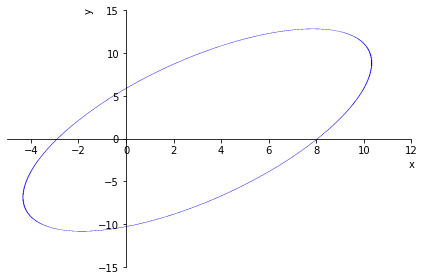

sympy.plotting.plot.Plot

In [12]:
p=plot_implicit(EQ,(x,-5,12),(y,-15,15))
type(p)

### Немного о plot_implicit
plot_implicit позволяет изобразить график одной кривой, заданной неявно с помощью уравнения.

Если нужно построить на одной плоскости два и более графика неявно заданных функций, можно поступить так:

вначале создаем все графики, указываем необязательный параметр show=False и запоминаем созданные с помощью plot_implicit объекты в переменные

затем объединяем объекты в один с помощью метода append

обратите внимание, что присоединяется только первый элемент созданных с помощью plot_implicit объектов, т.е. p1[0] и p2[0] (p1 и p2 - списки из одного элемента, к ним можно добавлять другие элементы типа график):

Введите натуральное нечетное число до 9
5


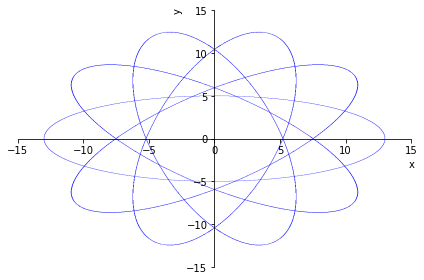

In [13]:
EQ0=Ellipse0.equation()
x,y=sorted(list(EQ0.free_symbols),key=str)
p0=plot_implicit(EQ0,(x,-15,15),(y,-15,15),show=False)
n=int(input('Введите натуральное нечетное число до 9\n'))
for i in range(1,n):
    p0.append(plot_implicit(Ellipse0.equation(_slope=tan(i*pi/n)),(x,-15,15),(y,-15,15),show=False)[0])
p0.show()